In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
rng

<module 'numpy.random' from '/Users/pandaman/.envs/dlplay/lib/python3.6/site-packages/numpy/random/__init__.py'>

In [3]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
X

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [7]:
pred = tf.add(tf.multiply(X, W), b)

In [8]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [10]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.095708720 W= 0.32623115 b= 0.25014117
Epoch: 0100 cost= 0.093542024 W= 0.32167313 b= 0.28293118
Epoch: 0150 cost= 0.091625780 W= 0.31738627 b= 0.313771
Epoch: 0200 cost= 0.089931101 W= 0.31335437 b= 0.3427759
Epoch: 0250 cost= 0.088432319 W= 0.30956224 b= 0.37005654
Epoch: 0300 cost= 0.087106802 W= 0.30599546 b= 0.39571473
Epoch: 0350 cost= 0.085934579 W= 0.30264106 b= 0.4198466
Epoch: 0400 cost= 0.084897928 W= 0.29948613 b= 0.44254318
Epoch: 0450 cost= 0.083981171 W= 0.29651874 b= 0.4638904
Epoch: 0500 cost= 0.083170466 W= 0.2937278 b= 0.48396802
Epoch: 0550 cost= 0.082453571 W= 0.29110304 b= 0.5028506
Epoch: 0600 cost= 0.081819661 W= 0.28863427 b= 0.52061075
Epoch: 0650 cost= 0.081259064 W= 0.28631228 b= 0.5373147
Epoch: 0700 cost= 0.080763385 W= 0.28412846 b= 0.55302495
Epoch: 0750 cost= 0.080325074 W= 0.28207436 b= 0.5678019
Epoch: 0800 cost= 0.079937525 W= 0.28014255 b= 0.58169955
Epoch: 0850 cost= 0.079594836 W= 0.27832553 b= 0.5947712
Epoch: 0900 cost= 0.0792

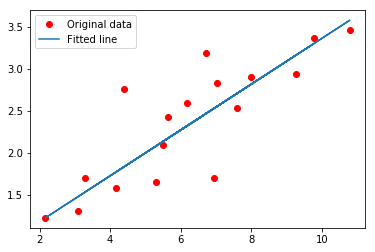

In [12]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()